In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

# Adjust css for usability
from IPython.core.display import HTML
HTML('''
<style type="text/css">

.jp-RenderedHTMLCommon table {
    table-layout: auto;
    border-collapse: collapse;
    width: 75%;
}

.jp-RenderedHTMLCommon table .absorbing-column {
    width: 75%;
}

</style>
''')

# NFESdata.csv description:

<table align="center">
    <tr>
        <th><b>Parameter</b></th>
        <th><b>Parameter_Units</b></th>
        <th><b>Data_Type</b></th>
        <th class="absorbing-column"><b>Description</b></th>
    </tr>
    <tr>
        <td><b>polymer</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>polymer used in the NFES solution</td>
    </tr>
    <tr>
        <td><b>molecularWeight</b></td>
        <td>$g \cdot {mol}^{-1}$</td>
        <td>float</td>
        <td>polymer molecular weight</td>
    </tr>
    <tr>
        <td><b>solvent</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>solvent used in the NFES solution</td>
    </tr>
    <tr>
        <td><b>solSurfaceTension</b></td>
        <td>$mN \cdot m^{-1}$</td>
        <td>float</td>
        <td>solvent surface tension at $298.2 K$ and $101325 Pa$</td>
    </tr>
    <tr>
        <td><b>solDielectricConstant</b></td>
        <td>$N/A$</td>
        <td>float</td>
        <td>solvent dielectric constant at $298.2 K$</td>
    </tr>
    <tr>
        <td><b>solBoilingPoint</b></td>
        <td>$^{\circ} C$</td>
        <td>float</td>
        <td>solvent boiling point</td>
    </tr>
    <tr>
        <td><b>solDensity</b></td>
        <td>$g \cdot ml^{-1}$</td>
        <td>float</td>
        <td>solvent density</td>
    </tr>
    <tr>
        <td><b>solVapourPressure</b></td>
        <td>$-TBD-$</td>
        <td>float</td>
        <td>solvent vapour pressure</td>
    </tr>
    <tr>
        <td><b>NFEStype</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>NFES process type/variant implemented in [reference]</td>
    </tr>
    <tr>
        <td><b>polConcentration</b></td>
        <td>$wt%$</td>
        <td>float</td>
        <td>polymer concentration used in the NFES solution</td>
    </tr>
    <tr>
        <td><b>nozzleDiameter</b></td>
        <td>$\mu m$</td>
        <td>float</td>
        <td>inner diameter of the dispensing nozzle</td>
    </tr>
    <tr>
        <td><b>depositionRate</b></td>
        <td>$\mu L \cdot h^{-1}$</td>
        <td>float</td>
        <td>rate at which the solution is dispensed from the reservoir</td>
    </tr>
    <tr>
        <td><b>substrate</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>composition of the collector</td>
    </tr>
    <tr>
        <td><b>nozzleSubDist</b></td>
        <td>$mm$</td>
        <td>float</td>
        <td>distance between the dispensing nozzle and the collector</td>
    </tr>
    <tr>
        <td><b>appliedVoltage</b></td>
        <td>$V$</td>
        <td>float</td>
        <td>applied voltage between the dispensing nozzle and the collector during NFES</td>
    </tr>
    <tr>
        <td><b>stageVelocity</b></td>
        <td>$mm \cdot s^{-1}$</td>
        <td>float</td>
        <td>velocity at which the stage/collector moves with respect to the dispensing nozzle</td>
    </tr>
    <tr>
        <td><b>fiberDiameter</b></td>
        <td>$nm$</td>
        <td>float</td>
        <td>diameter of the produced fibers</td>
    </tr>
    <tr>
        <td><b>distBetweenFibers</b></td>
        <td>$\mu m$</td>
        <td>float</td>
        <td>minimum distance achieved between two parallel fibers</td>
    </tr>
    <tr>
        <td><b>reference</b></td>
        <td>$N/A$</td>
        <td>string</td>
        <td>reference author name and publication year</td>
    </tr>
</table>

In [2]:
df = pd.read_csv("./NFESdata.csv", delimiter=",");
display(df.head())

,polymer,molecularWeight,solvent,solSurfaceTension,solDielectricConstant,solBoilingPoint,solDensity,solVapourPressure,NFEStype,polConcentration,nozzleDiameter,depositionRate,substrate,nozzleSubDist,appliedVoltage,stageVelocity,fiberDiameter,distBetweenFibers,reference
0,Gelatin,NaN,AceticAcid,26.5555,6.1700,NaN,NaN,NaN,NFES,11.0,1080.0,NaN,PDMS,1.25,1000.0,NaN,2500.0,40.0,Xue 2014
1,PVDF,534000.0,Acetone,22.4998,20.9000,NaN,NaN,NaN,3D ES,17.0,100.0,0.84,paper,0.75,1900.0,10.0,NaN,NaN,Kim 2018
2,POSS-PCU,2000.0,Butanol,24.1947,17.4849,NaN,NaN,NaN,EHD jetting,20.0,750.0,60.00,NaN,1.25,9000.0,10.0,27500.0,250.0,Gupta 2007
3,POSS-PCL-PCU,2000.0,Butanol,24.1947,17.4849,NaN,NaN,NaN,EHD jetting,20.0,750.0,60.00,NaN,1.25,9000.0,10.0,27500.0,250.0,Gupta 2007
4,POSS-PCU,2000.0,Dimethylacetamide DMAC,34.0000,23.0000,NaN,NaN,NaN,EHD jetting,20.0,750.0,60.00,NaN,1.25,9000.0,10.0,27500.0,250.0,Gupta 2007


In [3]:
# df.loc[<ROWS RANGE> , <COLUMNS RANGE>] to get elements by index
    
# Assign a numeric value to string data type values
for col in range(len(df.columns)):
    if str(type(df.iloc[0 , col])) == "<class 'str'>":
        df.iloc[: , col] = number.fit_transform(df.iloc[: , col].astype('str'))

## Print column name and its data type
#print()
#for col in range(len(df.columns)):
#    print(str(df.columns[col]) + ' ' + str(type(df.iloc[0 , col])))

display(df.head());

,polymer,molecularWeight,solvent,solSurfaceTension,solDielectricConstant,solBoilingPoint,solDensity,solVapourPressure,NFEStype,polConcentration,nozzleDiameter,depositionRate,substrate,nozzleSubDist,appliedVoltage,stageVelocity,fiberDiameter,distBetweenFibers,reference
0,0,NaN,1,26.5555,6.1700,NaN,NaN,NaN,8,11.0,1080.0,NaN,3,1.25,1000.0,NaN,2500.0,40.0,19
1,8,534000.0,2,22.4998,20.9000,NaN,NaN,NaN,0,17.0,100.0,0.84,9,0.75,1900.0,10.0,NaN,NaN,9
2,6,2000.0,3,24.1947,17.4849,NaN,NaN,NaN,3,20.0,750.0,60.00,8,1.25,9000.0,10.0,27500.0,250.0,6
3,5,2000.0,3,24.1947,17.4849,NaN,NaN,NaN,3,20.0,750.0,60.00,8,1.25,9000.0,10.0,27500.0,250.0,6
4,6,2000.0,4,34.0000,23.0000,NaN,NaN,NaN,3,20.0,750.0,60.00,8,1.25,9000.0,10.0,27500.0,250.0,6


# Correlation Matrix

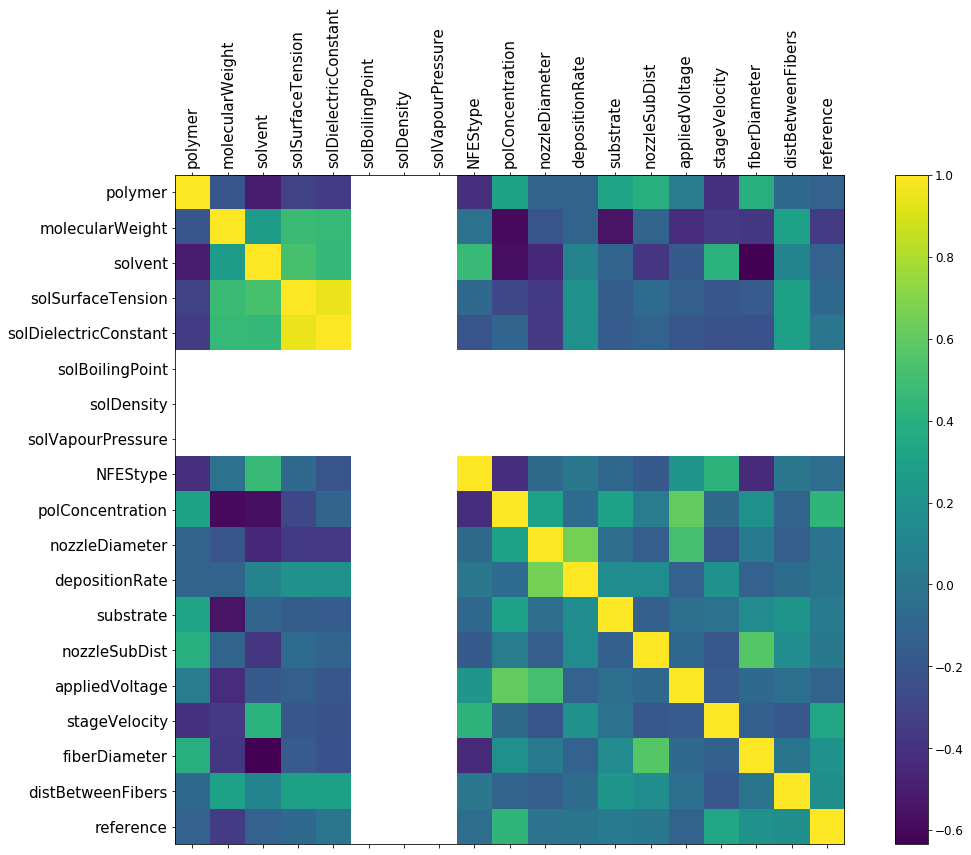

In [4]:
scale = 6;
fig = plt.figure(figsize=(3*scale, 2*scale))
plt.matshow(df.corr(), fignum=fig.number)
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, rotation=00)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
#plt.title('Correlation Matrix', fontsize=16);
plt.show()